In [21]:
import sys
import os

pwd = os.path.dirname(os.path.realpath('__file__'))
print(pwd)

sys.path.append(pwd + "../")
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "geodjango.settings")
import django
import numpy as np
import pandas as pd
django.setup()

D:\DataMiningLab\geodjango


In [29]:
from django.db.models import Count, Sum, Avg
from taxi.models import Trip,Edge
tail = 190
head = 170
main_edge = Trip.objects.all().filter(pickupDistrict=tail,dropoffDistrict=head).values('pickupDistrict','dropoffDistrict').order_by(). \
        annotate(weight=Count('pk'),total_amout=Avg('totalAmount'))

In [7]:
str(main_edge)

"<GeoQuerySet [{'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.697880098165244, 'weight': 77013}]>"

In [9]:
from django.db import connection
print(connection.queries)

[{'sql': 'SELECT "taxi_trip_part"."pickupDistrict_id", "taxi_trip_part"."dropoffDistrict_id", COUNT("taxi_trip_part"."id") AS "weight" FROM "taxi_trip_part" WHERE ("taxi_trip_part"."dropoffDistrict_id" = 170 AND "taxi_trip_part"."pickupDistrict_id" = 190) GROUP BY "taxi_trip_part"."pickupDistrict_id", "taxi_trip_part"."dropoffDistrict_id" LIMIT 21', 'time': '225.787'}, {'sql': 'SELECT "taxi_trip_part"."pickupDistrict_id", "taxi_trip_part"."dropoffDistrict_id", AVG("taxi_trip_part"."totalAmount") AS "total_amout", COUNT("taxi_trip_part"."id") AS "weight" FROM "taxi_trip_part" WHERE ("taxi_trip_part"."dropoffDistrict_id" = 170 AND "taxi_trip_part"."pickupDistrict_id" = 190) GROUP BY "taxi_trip_part"."pickupDistrict_id", "taxi_trip_part"."dropoffDistrict_id" LIMIT 21', 'time': '132.935'}]


In [9]:
from django.db.models import Func, F
class Day(Func):
    function = 'date_trunc'
    template = '%(function)s(\'day\',%(expressions)s)'

In [3]:
from django.db.models import Count, Sum, Avg
from taxi.models import Trip
main_edge = Trip.objects.all().filter(pickupDistrict=district_to_examine,dropoffDistrict=170).values('pickupDistrict','dropoffDistrict').order_by(). \
        annotate(weight=Count('pk'),total_amount=Avg('totalAmount'),day=Day('pickupTime'))

In [4]:
str(main_edge)

"<GeoQuerySet [{'day': datetime.datetime(2016, 1, 1, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.993251028806585, 'weight': 486}, {'day': datetime.datetime(2016, 1, 2, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.479532710280374, 'weight': 428}, {'day': datetime.datetime(2016, 1, 3, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.541007194244605, 'weight': 417}, {'day': datetime.datetime(2016, 1, 4, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.364704433497536, 'weight': 406}, {'day': datetime.datetime(2016, 1, 5, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.495053191489362, 'weight': 376}, {'day': datetime.datetime(2016, 1, 6, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.530325203252033, 'weight': 369}, {'day': datetime.datetime(2016, 1, 7, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.577479452054794, 'weight

In [5]:
from django.db import connection
print(connection.queries)

[{'sql': 'SELECT "taxi_trip_part"."pickupDistrict_id", "taxi_trip_part"."dropoffDistrict_id", date_trunc(\'day\',"taxi_trip_part"."pickupTime") AS "day", AVG("taxi_trip_part"."totalAmount") AS "total_amout", COUNT("taxi_trip_part"."id") AS "weight" FROM "taxi_trip_part" WHERE ("taxi_trip_part"."dropoffDistrict_id" = 170 AND "taxi_trip_part"."pickupDistrict_id" = 190) GROUP BY "taxi_trip_part"."pickupDistrict_id", "taxi_trip_part"."dropoffDistrict_id", date_trunc(\'day\',"taxi_trip_part"."pickupTime") LIMIT 21', 'time': '68.603'}]


In [19]:
main_edge_mtx = np.core.records.fromrecords(main_edge,names=['day','pickup','dropoff','total_amount','weight'])

In [24]:
main_edge_mtx['day']

array({'day': datetime.datetime(2016, 1, 1, 0, 0), 'dropoffDistrict': 170, 'pickupDistrict': 190, 'total_amout': 8.993251028806585, 'weight': 486}, dtype=object)

In [30]:
main_edge_list = list(main_edge)
main_edge_mtx = np.array(main_edge)

In [49]:
main_edge_array = np.array(list(main_edge.values_list('day','weight')))

In [42]:
main_edge_array

array([[datetime.datetime(2016, 1, 1, 0, 0), 170, 486],
       [datetime.datetime(2016, 1, 2, 0, 0), 170, 428],
       [datetime.datetime(2016, 1, 3, 0, 0), 170, 417],
       [datetime.datetime(2016, 1, 4, 0, 0), 170, 406],
       [datetime.datetime(2016, 1, 5, 0, 0), 170, 376],
       [datetime.datetime(2016, 1, 6, 0, 0), 170, 369],
       [datetime.datetime(2016, 1, 7, 0, 0), 170, 365],
       [datetime.datetime(2016, 1, 8, 0, 0), 170, 459],
       [datetime.datetime(2016, 1, 9, 0, 0), 170, 652],
       [datetime.datetime(2016, 1, 10, 0, 0), 170, 551],
       [datetime.datetime(2016, 1, 11, 0, 0), 170, 393],
       [datetime.datetime(2016, 1, 12, 0, 0), 170, 383],
       [datetime.datetime(2016, 1, 13, 0, 0), 170, 457],
       [datetime.datetime(2016, 1, 14, 0, 0), 170, 393],
       [datetime.datetime(2016, 1, 15, 0, 0), 170, 438],
       [datetime.datetime(2016, 1, 16, 0, 0), 170, 668],
       [datetime.datetime(2016, 1, 17, 0, 0), 170, 648],
       [datetime.datetime(2016, 1, 18, 0

In [50]:
df = pd.DataFrame(main_edge_array)

d:\ProgramData\Anaconda3\envs\python34\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


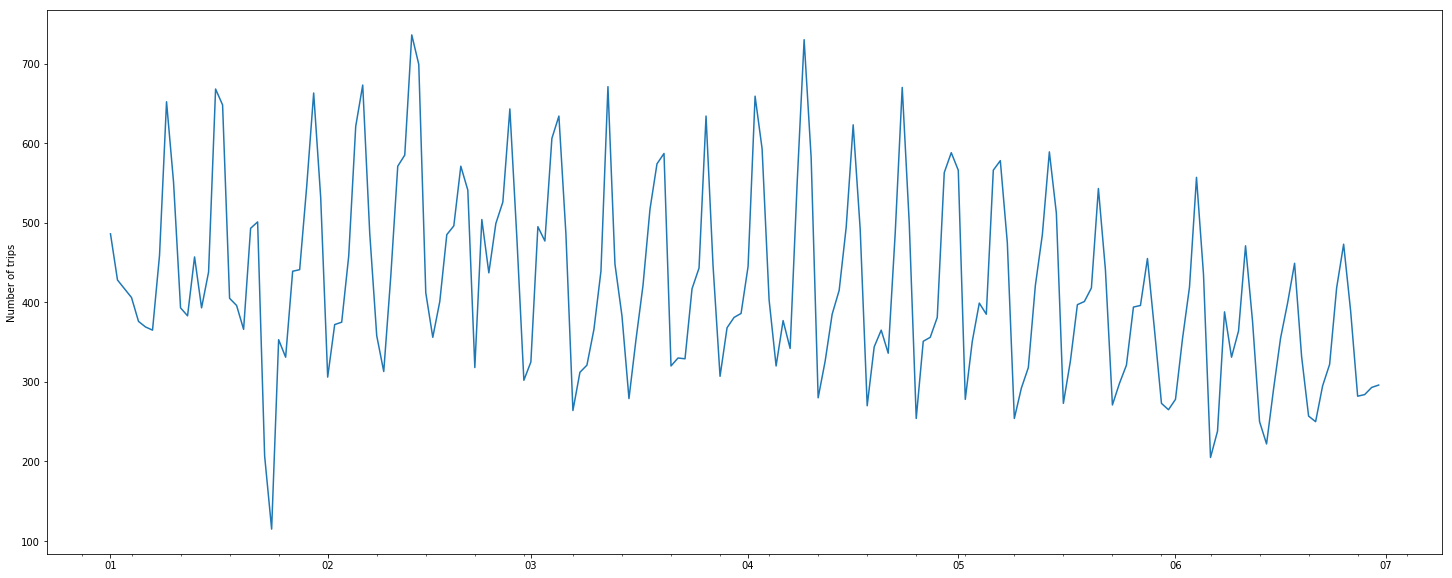

In [63]:
%matplotlib inline
trend = pd.DataFrame(df[1].values)
trend.index = df[0].values
trend.columns = ["N"]
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO
fig, ax = plt.subplots(figsize=(25, 10))
months = mdates.MonthLocator()  # every month\
weeks = mdates.WeekdayLocator(byweekday=MO)
monthsFmt = mdates.DateFormatter('%m')
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(weeks)
ax.set_ylabel("Number of trips")
ax.plot_date(df[0].values, df[1].values, '-')
fig.show()

Neighbourhood:
<GeoQuerySet [(104, 35343), (115, 27533), (106, 22352), (116, 17211)]>

In [7]:
neighbour_dropoff = Edge.objects.all().filter(tripset = 29).filter(tail=district_to_examine).exclude(head=district_to_examine).order_by('-weight')[1:4]
'''neighbour_dropoff = Trip.objects.all().filter(pickupDistrict=190).exclude(dropoffDistrict=190).values('pickupDistrict','dropoffDistrict').order_by(). \
        annotate(weight=Count('pk')).order_by('-weight')[1:4]'''
neighbour_dropoff_val = neighbour_dropoff.values_list('head','weight')

In [ ]:
#!pip install django-pivot
from django_pivot.pivot import pivot
from django_pivot.histogram import histogram
neighbour_dropoff_day = Trip.objects.all().filter(pickupDistrict=district_to_examine,dropoffDistrict__in=neighbour_dropoff.values_list('head',flat=True)).values('pickupDistrict','dropoffDistrict').order_by(). \
        annotate(weight=Count('pk'),total_amount=Avg('totalAmount'),day=Day('pickupTime'))
neighbour_dropoff_day = pivot(neighbour_dropoff_day, 'dropoffDistrict', 'day', 'weight')
neighbour_dropoff_array = np.array(list(neighbour_dropoff_day.values_list('day','dropoffDistrict','weight'))) 
neighbour_dropoff_array

In [17]:
neighbour_dropoff_day

<GeoQuerySet [{'dropoffDistrict': 104, 'weight': 347, 'day': datetime.datetime(2016, 1, 1, 0, 0)}, {'dropoffDistrict': 104, 'weight': 209, 'day': datetime.datetime(2016, 1, 2, 0, 0)}, {'dropoffDistrict': 104, 'weight': 258, 'day': datetime.datetime(2016, 1, 3, 0, 0)}, {'dropoffDistrict': 104, 'weight': 104, 'day': datetime.datetime(2016, 1, 4, 0, 0)}, {'dropoffDistrict': 104, 'weight': 103, 'day': datetime.datetime(2016, 1, 5, 0, 0)}, {'dropoffDistrict': 104, 'weight': 116, 'day': datetime.datetime(2016, 1, 6, 0, 0)}, {'dropoffDistrict': 104, 'weight': 140, 'day': datetime.datetime(2016, 1, 7, 0, 0)}, {'dropoffDistrict': 104, 'weight': 195, 'day': datetime.datetime(2016, 1, 8, 0, 0)}, {'dropoffDistrict': 104, 'weight': 382, 'day': datetime.datetime(2016, 1, 9, 0, 0)}, {'dropoffDistrict': 104, 'weight': 371, 'day': datetime.datetime(2016, 1, 10, 0, 0)}, {'dropoffDistrict': 104, 'weight': 124, 'day': datetime.datetime(2016, 1, 11, 0, 0)}, {'dropoffDistrict': 104, 'weight': 121, 'day': da

In [23]:
neighbour_dropoff_day_array = np.array(list(neighbour_dropoff_day.values_list('day','dropoffDistrict','weight'))) 

In [27]:
neighbour_dropoff_day_tab = pd.pivot_table(pd.DataFrame(neighbour_dropoff_day_array), values=2, index=0,
                     columns=1, aggfunc=np.sum)
#neighbour_dropoff_day_tab = pd.crosstab(neighbour_dropoff_day_array[:,0], neighbour_dropoff_day_array[:,1], values = neighbour_dropoff_day_array[:,2])

In [28]:
neighbour_dropoff_day_tab

1,104,106,115
0,,,
2016-01-01,347,213,275
2016-01-02,209,124,185
2016-01-03,258,153,213
2016-01-04,104,71,67
2016-01-05,103,74,71
2016-01-06,116,75,85
2016-01-07,140,93,87
2016-01-08,195,121,130
2016-01-09,382,175,265
